# Project for UDA Assessment 4
## Author: 02179784 (Mark Roberts)

<B>Project Description:</B><BR>
The objective of this project is to create an image classification model and determine how its accuracy degrades as noise is added to the images it must classify.

The dataset consists of black & white images of dogs and cats - 5000 of each.  The dataset was obtained from
Kaggle: [Cat and Dog Images](https://www.kaggle.com/datasets/chetankv/dogs-cats-images).<BR>
The original dataset was of coloured images but the dataset was too large so the images where converted to black & white and resized to be 150 x 150 pixels, with each pixel taking a value between 0 and 255.<BR>
The Kaggle images have already been split into training and test images - 8000 training images of cats and dogs and 2000 test images of cats and dogs!

The model used was not a sophisticated one, but one that gave a reasonable degree of accuracy after training (i.e. greater than 90%).  The model could be swapped out for a more sophisticated one without altering the structure of the notebook.  In this way various models could be tested to see how they perform under \"noisy\" conditions.

The analysis has been split into the following steps:
 - Train the classification model using the clean black & white images.
 - Determine accuracy of the model
 - Add various levels of noise to the test images & determine accuracy of the model.
 - Conclusion / Summary


<B>General Information:</B><BR>
 - This script was run on a Macbook Pro. with 32 GB of RAM.
 - The total run time of the Jupyter notebook was (approx) 120 seconds.
 - The Github repository for all code and datasets can be obtained by cloning the repository:
[GitHub-Repo](git@github.com:Mark12481632/UDA_Assessment_4_02179784_Roberts.git)
 - The model used to classify the images is based on __Keras__ and much of the code for this model was obtained from the book: Deep Learning with Python (ISBN-13: 978-1-61729-443-3)

In [1]:
# Import the libraries we will use:\n",

import numpy as np
import matplotlib.pyplot as plt

from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

2022-12-22 06:29:59.218969: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Set seed for any random sampling made:
np.random.seed(2179784)  # My CID

In [20]:
# Common variables:

# Directories containing the training & test images
train_dir = "./pets_bw/training_set"                 # Total of 3114 Training images
test_dir = "./pets_bw/test_set"                      # Total of 890 Test images.

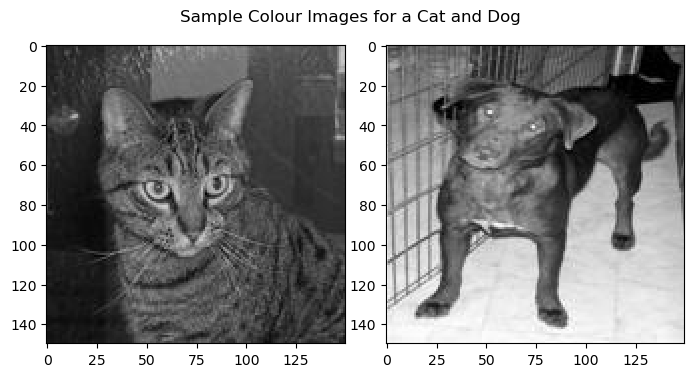

In [21]:
# Show examples of the clean colour cat and dog images we will be working with:

fig = plt.figure(figsize=(7, 7))
fig.suptitle('Sample Colour Images for a Cat and Dog')
ax_1 = fig.add_subplot(2,2,1)
io.imshow(io.imread(train_dir + "/cat/cat.1.jpg"))
ax_2 = fig.add_subplot(2,2,2)
io.imshow(io.imread(train_dir + "/dog/dog.1.jpg"))

In [25]:
# Function to create the model we will use for image classification

def create_model(train_dataset_dir, test_dataset_dir):
    """
    This function creates the model for image classification.  This function can be replaced when
    another model is to be used!

    This main details for this Keras model was obtained from the book: Deep Learning with Python. 

    Inputs:
        train_dataset_dir - Directory that contains the training dataset.
                            In this directory there must be two sub-directories named "cat" and "dog"
                            which congtain the cat and dog training images respectively.
        test_dataset_dir  - Directory that contains the test dataset.
                            In this directory there must be two sub-directories named "cat" and "dog"
                            which congtain the cat and dog testing images respectively.

    Returns:
        (model, acc) - Tuple.
                       model - The trained model
                       acc - The accuracy of the model on the test dataset
    """
    # Build model structure

    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,1)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    # Configure model:

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-4),
                  metrics=['acc'])

    # Generator for training data and used to train model:

    train_generator = ImageDataGenerator(rescale=1/255,
                                         rotation_range=40,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True,
                                         fill_mode='nearest')
    train_data_generator = train_generator.flow_from_directory(train_dataset_dir,
                                                               target_size=(150, 150),
                                                               batch_size=32,
                                                               class_mode='binary')

    test_generator = ImageDataGenerator(rescale=1/255)
    test_data_generator = test_generator.flow_from_directory(test_dataset_dir,
                                                             target_size=(150, 150),
                                                             batch_size=32,
                                                             class_mode='binary')

    # Fit the model:
    hist = model.fit(train_data_generator,
                     steps_per_epoch=100,
                     epochs=45,
                     validation_data=test_data_generator,
                     validation_steps=50)

    # Return the model and its accuracy on the test datasets
    return (model, hist.history['val_acc'])

In [26]:
# Create the trained model and the test accuracy statistics:
model, accuracy = create_model(train_dir, test_dir)

# Save model:
model.save("./model_dogs_cats.h5")

# Show accuracy on test data
print(accuracy)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/45


UnimplementedError: Graph execution error:

Detected at node 'sequential_4/conv2d_16/Relu' defined at (most recent call last):
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/pm/qn6ytz3x4hn6_8dbh2l8dk6m0000gn/T/ipykernel_41803/1624926666.py", line 2, in <module>
      model, accuracy = create_model(train_dir, test_dir)
    File "/var/folders/pm/qn6ytz3x4hn6_8dbh2l8dk6m0000gn/T/ipykernel_41803/3655666781.py", line 68, in create_model
      hist = model.fit(train_data_generator,
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/engine/sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/layers/convolutional/base_conv.py", line 314, in call
      return self.activation(outputs)
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/Users/markroberts/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'sequential_4/conv2d_16/Relu'
Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential_4/conv2d_16/Relu}}]] [Op:__inference_train_function_213636]

In [15]:
print(accuracy[38:44])


[0.8025000095367432, 0.7381250262260437, 0.7943750023841858, 0.75, 0.7325000166893005, 0.8050000071525574]


In [18]:
from keras.applications import VGG16

conv = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [23]:
xx = io.imread(train_dir + "/cat/cat.1.jpg")
xx.size

22500

In [24]:
150*150

22500